#### Data load

In [1]:
import pandas as pd
import numpy as np

# Load and merge as before
excel_file = './stock_market_data.xlsx'
prices_2010_2020 = pd.read_excel(excel_file, sheet_name='2010-2020')
prices_2021_2024 = pd.read_excel(excel_file, sheet_name='2021-2024')
price_df = pd.concat([prices_2010_2020, prices_2021_2024], ignore_index=True)

# exclude 2010,2011 data
price_df = price_df[~price_df['Date'].dt.year.isin([2010, 2011])]

# Convert 'NULL' strings to actual NaN
price_df.replace('NULL', np.nan, inplace=True)

# no of total rows
total_rows = price_df.shape[0]

price_df.head(20)




,Date,Symbol,Open_Price,High_Price,Low_Price,Closing_Price,no_of_trade,Volume,Turnover
119570,2012-01-01,1JANATAMF,9.0,9.1,8.7,8.9,287.0,701000.0,6282000.0
119571,2012-01-01,1STBSRS,94.0,97.5,94.0,95.9,44.0,26500.0,2527000.0
119572,2012-01-01,1STPRIMFMF,22.0,23.8,21.7,22.8,348.0,558000.0,12701000.0
119573,2012-01-01,5THICB,155.1,155.1,155.1,155.1,1.0,100.0,16000.0
119574,2012-01-01,6THICB,48.3,48.4,47.2,47.7,41.0,13200.0,630000.0
119575,2012-01-01,7THICB,91.0,92.2,91.0,91.6,2.0,1000.0,92000.0
119576,2012-01-01,ABBANK,68.8,69.2,68.0,68.7,1113.0,409600.0,28041000.0
119577,2012-01-01,ACI,206.0,212.1,206.0,210.6,93.0,10000.0,2104000.0
119578,2012-01-01,ACIFORMULA,89.3,92.0,89.3,89.9,203.0,44600.0,4067000.0
119579,2012-01-01,ACIZCBOND,825.5,827.0,820.5,822.0,88.0,3044.0,2503000.0


#### Step2: Preprocess the dataset

In [7]:

# Convert 'Date' column to datetime
price_df['Date'] = pd.to_datetime(price_df['Date'], format='%Y-%m-%d', errors='coerce')


# print the symbol contains null any column
null_columns = price_df.columns[price_df.isnull().any()].tolist()
print("Columns with null values:", null_columns)

# Check for any rows with null values in any column
null_rows_df = price_df[price_df.isnull().any(axis=1)]
null_rows_count = null_rows_df.shape[0]
print("Number of rows with null values:", null_rows_count, "out of", total_rows)

null_rows_df.head(20)

# remove the rows with null values
price_df.dropna(inplace=True)
cleaned_df = price_df.copy()
# Check the number of rows after dropping nulls
remaining_rows = price_df.shape[0]
print("Number of rows after dropping null values:", remaining_rows)

# price_df number of rows
print("Number of rows in price_df:", price_df.shape[0])

cleaned_df.head(20)


## debug to see that null values are removed or not

# # check date 2014-12-11 for symbol '3RDICB'
# date_check_df = price_df[(price_df['Date'] == '2014-12-11') & (price_df['Symbol'] == '3RDICB')]
# if not date_check_df.empty:
#     print("Data for 3RDICB on 2014-12-11:")
#     print(date_check_df)
# else:
#     print("No data found for 3RDICB on 2014-12-11.")



Columns with null values: []
Number of rows with null values: 0 out of 1107420
Number of rows after dropping null values: 1029783
Number of rows in price_df: 1029783


,Date,Symbol,Open_Price,High_Price,Low_Price,Closing_Price,no_of_trade,Volume,Turnover
119570,2012-01-01,1JANATAMF,9.0,9.1,8.7,8.9,287.0,701000.0,6282000.0
119571,2012-01-01,1STBSRS,94.0,97.5,94.0,95.9,44.0,26500.0,2527000.0
119572,2012-01-01,1STPRIMFMF,22.0,23.8,21.7,22.8,348.0,558000.0,12701000.0
119573,2012-01-01,5THICB,155.1,155.1,155.1,155.1,1.0,100.0,16000.0
119574,2012-01-01,6THICB,48.3,48.4,47.2,47.7,41.0,13200.0,630000.0
119575,2012-01-01,7THICB,91.0,92.2,91.0,91.6,2.0,1000.0,92000.0
119576,2012-01-01,ABBANK,68.8,69.2,68.0,68.7,1113.0,409600.0,28041000.0
119577,2012-01-01,ACI,206.0,212.1,206.0,210.6,93.0,10000.0,2104000.0
119578,2012-01-01,ACIFORMULA,89.3,92.0,89.3,89.9,203.0,44600.0,4067000.0
119579,2012-01-01,ACIZCBOND,825.5,827.0,820.5,822.0,88.0,3044.0,2503000.0


In [3]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

show_plot_for_symbol = 'BEXIMCO' 
symbol_df = cleaned_df[cleaned_df['Symbol'] == show_plot_for_symbol]

# Create subplots
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, 
                    vertical_spacing=0.03, 
                    row_heights=[0.6, 0.2, 0.2])

# Candlestick
fig.add_trace(go.Candlestick(x=symbol_df['Date'],
                             open=symbol_df['Open_Price'],
                             high=symbol_df['High_Price'],
                             low=symbol_df['Low_Price'],
                             close=symbol_df['Closing_Price'],
                             name='Price'), row=1, col=1)

# Volume
fig.add_trace(go.Bar(x=symbol_df['Date'], 
                     y=symbol_df['Volume'],
                     name='Volume',
                     marker_color='green'), row=2, col=1)

# Turnover
fig.add_trace(go.Scatter(x=symbol_df['Date'],
                         y=symbol_df['Turnover'],
                         name='Turnover',
                         line=dict(color='blue')), row=3, col=1)

# Update layout
fig.update_layout(title=f'{show_plot_for_symbol} Stock Analysis',
                  height=800,
                  xaxis_rangeslider_visible=False)

fig.show()

#### Step3: Feature engineering
Features:
- Price Change
- Intraday range
- Volatility
- Volume spike
- Trade count spike
- Turnover spike
- VWAP
- Relative turnover
- Price-to-Volume Ration

30 day rolling window

In [ ]:
#show all columns
pd.set_option('display.max_columns', None)

df = cleaned_df.copy()

# Price Change (%) = (Closing - Opening) / Opening × 100
df['Price_Change_Pct'] = ((df['Closing_Price'] - df['Open_Price']) / df['Open_Price']) * 100

# Intraday Range = High - Low
df['Intraday_Range'] = df['High_Price'] - df['Low_Price']

# Volatility = Rolling standard deviation of Closing_Price (30-day)
df['Volatility'] = df.groupby('Symbol')['Closing_Price'].transform(
    lambda x: x.rolling(30, min_periods=1).std())

# Volume Spike = Volume / 30-day moving average
df['Avg_Volume_30d'] = df.groupby('Symbol')['Volume'].transform(
    lambda x: x.rolling(30, min_periods=1).mean())
df['Volume_Spike'] = df['Volume'] / df['Avg_Volume_30d']

# Trade Count Spike = no_of_trade / 30-day moving average
df['Avg_Trade_Count_30d'] = df.groupby('Symbol')['no_of_trade'].transform(
    lambda x: x.rolling(30, min_periods=1).mean())
df['Trade_Count_Spike'] = df['no_of_trade'] / df['Avg_Trade_Count_30d']

# Turnover Spike = Turnover / 30-day moving average
df['Avg_Turnover_30d'] = df.groupby('Symbol')['Turnover'].transform(
    lambda x: x.rolling(30, min_periods=1).mean())
df['Turnover_Spike'] = df['Turnover'] / df['Avg_Turnover_30d']

# VWAP = Turnover / Volume
df['VWAP'] = df['Turnover'] / df['Volume']

# Relative Turnover = Turnover / (no_of_trade × avg_price)
df['Avg_Price'] = (df['Open_Price'] + df['Closing_Price']) / 2
df['Relative_Turnover'] = df['Turnover'] / (df['no_of_trade'] * df['Avg_Price'])

# Price-to-Volume Ratio = Closing_Price / Volume
df['Price_to_Volume_Ratio'] = df['Closing_Price'] / df['Volume']

# Handle NaN/Infinite values using explicit assignment
for col in ['Volume_Spike', 'Trade_Count_Spike', 'Turnover_Spike', 'VWAP', 
            'Relative_Turnover', 'Price_to_Volume_Ratio', 'Volatility']:
    df[col] = df[col].replace([np.inf, -np.inf], np.nan)
    df[col] = df[col].fillna(1.0 if 'Spike' in col or 'Ratio' in col else 0.0)

#show the features
df.head(10)

,Date,Symbol,Open_Price,High_Price,Low_Price,Closing_Price,no_of_trade,Volume,Turnover,Price_Change_Pct,Intraday_Range,Volatility,Avg_Volume_30d,Volume_Spike,Avg_Trade_Count_30d,Trade_Count_Spike,Avg_Turnover_30d,Turnover_Spike,VWAP,Avg_Price,Relative_Turnover,Price_to_Volume_Ratio
119570,2012-01-01,1JANATAMF,9.0,9.1,8.7,8.9,287.0,701000.0,6282000.0,-1.111111,0.4,0.0,701000.0,1.0,287.0,1.0,6282000.0,1.0,8.961484,8.95,2445.642653,0.000013
119571,2012-01-01,1STBSRS,94.0,97.5,94.0,95.9,44.0,26500.0,2527000.0,2.021277,3.5,0.0,26500.0,1.0,44.0,1.0,2527000.0,1.0,95.358491,94.95,604.863804,0.003619
119572,2012-01-01,1STPRIMFMF,22.0,23.8,21.7,22.8,348.0,558000.0,12701000.0,3.636364,2.1,0.0,558000.0,1.0,348.0,1.0,12701000.0,1.0,22.761649,22.40,1629.336002,0.000041
119573,2012-01-01,5THICB,155.1,155.1,155.1,155.1,1.0,100.0,16000.0,0.000000,0.0,0.0,100.0,1.0,1.0,1.0,16000.0,1.0,160.000000,155.10,103.159252,1.551000
119574,2012-01-01,6THICB,48.3,48.4,47.2,47.7,41.0,13200.0,630000.0,-1.242236,1.2,0.0,13200.0,1.0,41.0,1.0,630000.0,1.0,47.727273,48.00,320.121951,0.003614
119575,2012-01-01,7THICB,91.0,92.2,91.0,91.6,2.0,1000.0,92000.0,0.659341,1.2,0.0,1000.0,1.0,2.0,1.0,92000.0,1.0,92.000000,91.30,503.833516,0.091600
119576,2012-01-01,ABBANK,68.8,69.2,68.0,68.7,1113.0,409600.0,28041000.0,-0.145349,1.2,0.0,409600.0,1.0,1113.0,1.0,28041000.0,1.0,68.459473,68.75,366.459201,0.000168
119577,2012-01-01,ACI,206.0,212.1,206.0,210.6,93.0,10000.0,2104000.0,2.233010,6.1,0.0,10000.0,1.0,93.0,1.0,2104000.0,1.0,210.400000,208.30,108.610926,0.021060
119578,2012-01-01,ACIFORMULA,89.3,92.0,89.3,89.9,203.0,44600.0,4067000.0,0.671892,2.7,0.0,44600.0,1.0,203.0,1.0,4067000.0,1.0,91.188341,89.60,223.599138,0.002016
119579,2012-01-01,ACIZCBOND,825.5,827.0,820.5,822.0,88.0,3044.0,2503000.0,-0.423985,6.5,0.0,3044.0,1.0,88.0,1.0,2503000.0,1.0,822.273325,823.75,34.528901,0.270039


#### Step 4: Feature Scaling

- Selected relevant features for scaling.
- Checked for and counted rows containing infinite (`inf`, `-inf`) or missing (`NaN`) values, which can occur due to division by zero or missing data in previous calculations.
- Replaced infinite values with `NaN` and removed all rows with missing or infinite values to ensure clean data for scaling.
- Used `StandardScaler` to standardize each feature so that they have a `mean of 0` and a standard `deviation of 1`. This ensures all features contribute equally to the model.

This process helps improve the accuracy and stability of downstream machine learning algorithms.

In [19]:
from sklearn.preprocessing import StandardScaler

features = ['Price_Change_Pct', 'Intraday_Range', 'Volatility', 'Volume_Spike', 
            'Trade_Count_Spike', 'Turnover_Spike', 'VWAP', 'Relative_Turnover', 
            'Price_to_Volume_Ratio']
X = df[features].copy()

# Count rows before cleaning
rows_before = X.shape[0]

# Find rows with inf/-inf or NaN
mask_inf = X.isin([np.inf, -np.inf]).any(axis=1)
mask_nan = X.isnull().any(axis=1)
rows_with_issues = X[mask_inf | mask_nan].shape[0]
print(f"Rows with inf/-inf or NaN: {rows_with_issues}")

# Remove inf/-inf and NaN before scaling
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()

rows_after = X.shape[0]
print(f"Rows before cleaning: {rows_before}, after cleaning: {rows_after}")

# Align df with X to maintain consistency
df = df.loc[X.index]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=features, index=X.index)

X_scaled.head(10)

Rows with inf/-inf or NaN: 0
Rows before cleaning: 1019383, after cleaning: 1019383


,Price_Change_Pct,Intraday_Range,Volatility,Volume_Spike,Trade_Count_Spike,Turnover_Spike,VWAP,Relative_Turnover,Price_to_Volume_Ratio
119570,-0.090096,-0.270875,-0.186709,-0.060295,-0.058435,-0.063839,-0.102336,0.531743,-0.004887
119571,0.281562,0.026373,-0.186709,-0.060295,-0.058435,-0.063839,-0.022923,-0.317267,-0.004883
119572,0.473193,-0.107868,-0.186709,-0.060295,-0.058435,-0.063839,-0.089652,0.155243,-0.004887
119573,0.041737,-0.309229,-0.186709,-0.060295,-0.058435,-0.063839,0.036493,-0.548665,-0.003403
119574,-0.105654,-0.194166,-0.186709,-0.060295,-0.058435,-0.063839,-0.066704,-0.448597,-0.004883
119575,0.119968,-0.194166,-0.186709,-0.060295,-0.058435,-0.063839,-0.026010,-0.363865,-0.004799
119576,0.024492,-0.194166,-0.186709,-0.060295,-0.058435,-0.063839,-0.047648,-0.427225,-0.004886
119577,0.306684,0.275677,-0.186709,-0.060295,-0.058435,-0.063839,0.082819,-0.546150,-0.004866
119578,0.121457,-0.050336,-0.186709,-0.060295,-0.058435,-0.063839,-0.026756,-0.493115,-0.004885
119579,-0.008569,0.314031,-0.186709,-0.060295,-0.058435,-0.063839,0.645232,-0.580319,-0.004628


#### Step 5: Clustering with K-Means++ (Elbow Method)
- Checking the elbow point (where the inertia doesnt change even with the increment with the clusters)
- Initilize the centroid using k-means++ method (for smart initialization)
- random_state (to prevent randomness of kmeans++)

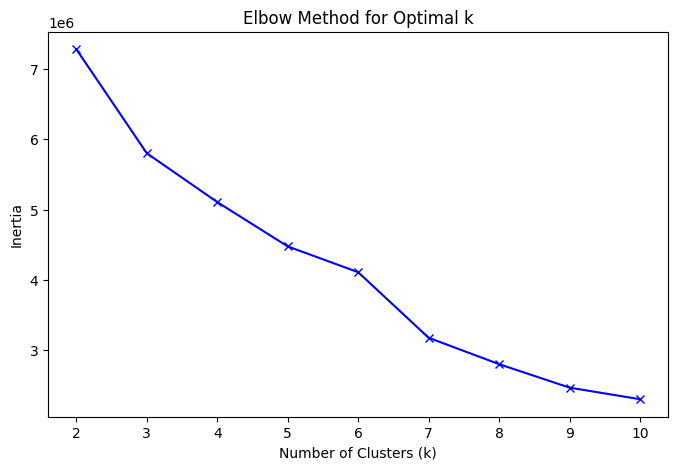

In [20]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
inertias = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertias, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
